# Importing from the Internet

## 1. Importing Flat files

### 1.1 Importing flat files from the web

The flat file to import will be `'winequality-red.csv'` from the University of California, Irvine's [Machine Learning repository](http://archive.ics.uci.edu/ml/index.html). The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

In [1]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = "https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv"

# Save file locally
urlretrieve(url, "datasets/winequality-red.csv")

# Read file into a DataFrame and print its head
df = pd.read_csv('datasets/winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### 1.2 Opening and reading flat files from the web
You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using pandas. In particular, you can use the function `pd.read_csv()` with the `URL` as the first argument and the separator `sep` as the second argument.

In [2]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = "https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv"

# Read file into a DataFrame: df
df = pd.read_csv(url, sep = ";")

# Print the head of the DataFrame
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

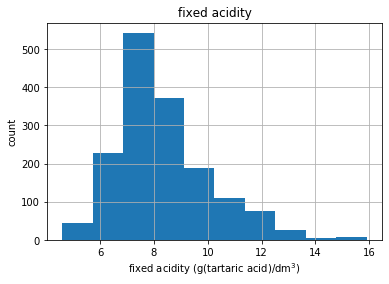

In [4]:
# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

### 1.3. Importing non-flat files from the web
Use `pd.read_excel()` to import an Excel spreadsheet.

Use `pd.read_excel()` to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of `pd.read_excel()` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [7]:
# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheet_name = None)

# Print the sheetnames to the shell
print(xl.keys())

odict_keys(['1700', '1900'])


In [8]:
# Print the head of the first sheet (using its name, NOT its index)
print(xl["1700"].head())

                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## 2. Performing HTTP requests in Python using urllib

Perform a GET request to extract information from Google.

Extract HTML itself. Right now, however, you are going to package and send the request and then catch the response.

In [4]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.google.com/"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(request))

# Be polite and close the response!
response.close()

<class 'urllib.request.Request'>


### 2.1 Printing HTTP request results in Python using urllib
You packaged and sent a GET request to "http://www.google.com/" and then caught the response. Such a response is a http.client.HTTPResponse object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a http.client.HTTPResponse object has an associated read() method. Here, extract the response and print the HTML.

In [19]:
# Specify the url
url = "https://www.python.org/~guido/"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<HTML>\n\n<HEAD>\n<TITLE>Guido\'s Personal Home Page</TITLE>\n</HEAD>\n\n<BODY BGCOLOR="#FFFFFF" TEXT="#000000">\n\n<H1>\n<a href="pics.html"><img border="0" src="images/IMG_2192.jpg"></a>\nGuido van Rossum - Personal Home Page\n<a href="pics.html"><img border=0 width=270 height=216 src="images/guido-headshot-2019.jpg"></a>\n</H1>\n\n<P><A\nHREF="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm" \n><i>"Gawky and proud of it."</i></A>\n\n\n<H3><a\nhref="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg" >Who\nI Am</a></H3>\n\n<p>Read\nmy <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">"King\'s\nDay Speech"</a> for some inspiration.\n\n<P>I am the author of the <A HREF="http://www.python.org" >Python</A>\nprogramming language.  See also my <A HREF="Resume.html">resume</A>\nand my <A HREF="Publications.html">publications list</A>, a <A\nHREF="bio.html" >brief bio</A>, assorted <a\nhref="http://legacy.python.

### 2.2 Performing HTTP requests in Python using requests
Using a higher-level requests library closing the connection is not required when using requests!

In [20]:
# Import package
import requests

# Specify the url: url
url = "https://www.python.org/~guido/"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<HTML>

<HEAD>
<TITLE>Guido's Personal Home Page</TITLE>
</HEAD>

<BODY BGCOLOR="#FFFFFF" TEXT="#000000">

<H1>
<a href="pics.html"><img border="0" src="images/IMG_2192.jpg"></a>
Guido van Rossum - Personal Home Page
<a href="pics.html"><img border=0 width=270 height=216 src="images/guido-headshot-2019.jpg"></a>
</H1>

<P><A
HREF="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm" 
><i>"Gawky and proud of it."</i></A>


<H3><a
href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg" >Who
I Am</a></H3>

<p>Read
my <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">"King's
Day Speech"</a> for some inspiration.

<P>I am the author of the <A HREF="http://www.python.org" >Python</A>
programming language.  See also my <A HREF="Resume.html">resume</A>
and my <A HREF="Publications.html">publications list</A>, a <A
HREF="bio.html" >brief bio</A>, assorted <a
href="http://legacy.python.org/doc/essays/">writings</a>, <a
h

### 2.3 Parsing HTML with BeautifulSoup
Use the BeautifulSoup package to parse, prettify and extract information from HTML. Scrape the data from the webpage of Guido van Rossum, Python's very own Benevolent Dictator for Life. Prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is url = 'https://www.python.org/~guido/'.

In [18]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r= requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
   <h3>
    <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
     Who
I Am
    </a>
   </h3>
   <p>
    Read
my
    <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
     "King's
Day Speech"
    </a>
    for some inspiration.
    <p>
     I am the author of the
     <a href="http://www.python.org">
      Python
     </a>
     programming language.  See also my
     <a href="Resume.html">
      resume
     </a>
   

### 2.4 Turning a webpage into data using BeautifulSoup: getting the text

Extract information from HTML soup. Extract text from the BDFL's webpage, along with printing the webpage's title.

In [16]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text= soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead refer you to
help (at) pytho

### 2.5 Turning a webpage into data using BeautifulSoup: getting the hyperlinks
Extract the URLs of the hyperlinks from the BDFL's webpage. Use the soup method `find_all()`.

In [17]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## 3. Using APIs
### 3.1 API requests
Pull some movie data down from the Open Movie Database (OMDB) using their API. The movie you'll query the API about is The Social Network. Recall that, in the video, to query the API about the movie `The Social Network`.

Note: recently, OMDB has changed their API and an API key also needs to be specified.

In [21]:
# Import requests package
import requests

# Assign URL to variable: url
url = "http://www.omdbapi.com/?t=the+social+network"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print (r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"95%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"571,335","imdbID":"tt

### 3.2 JSON–from the web to Python
Decode the JSON and print the key-value pairs of the resulting dictionary.

In [22]:
# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  571,335
imdbID:  tt1285016
Type:  movie
DVD:

### 3.3 The Wikipedia API
One more API: the Wikipedia API (documented [here](https://www.mediawiki.org/wiki/API:Main_page)). Extract information from the Wikipedia page for Pizza.The query will return nested JSONs, that is, JSONs with JSONs, but Python can handle that because it will translate them into dictionaries within dictionaries.

In [23]:
# Import package
import requests

# Assign URL to variable: url
url = "https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven. In formal settings, like a restaurant, pizza is eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since 

## 4. Using Twitter API
### 4.1 Authentication
The package tweepy is great at handling all the Twitter API OAuth Authentication details. Pass it your authentication credentials.

In [30]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
at = "z"
ats = "s"
ck = "y"
cs = "x"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(ck, cs)
auth.set_access_token(at, ats)

### 4.2. Streaming tweets
Now it is time to stream some tweets! A tweet stream listener class is defined as `MyStreamListener`

In [37]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

Create the Streamobject and to filter tweets according to particular keywords.

In [ ]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=["clinton", "trump", "sanders", "cruz"])

### 4.3. Load and explore your Twitter data
Twitter data is now sitting locally in a text file, it's time to explore it! Read the Twitter data into a list: `tweets_data``.

In [ ]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = "tweets.txt"

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

### 4.4. Twitter data to DataFrame
Extract the text and language of each tweet. Build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

In [ ]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=["text", "lang"])

### 4.5 A little bit of Twitter text analysis
Do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. Following function `word_in_text()` is defined, which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

```python
import re

def word_in_text(word, text):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, text)

    if match:
        return True
    return False
```

Iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

In [ ]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text("trump", row["text"])
    sanders += word_in_text("sanders", row["text"])
    cruz += word_in_text("cruz", row["text"])

### 4.6. Plotting your Twitter data
Plot a bar chart of this data. You'll use the statistical data visualization library `seaborn`. First `import seaborn as sns`. Then construct a barplot of the data using `sns.barplot`, passing it two arguments:

a list of labels and
a list containing the variables you wish to plot (clinton, trump and so on.)

In [ ]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()